### IMPORT ALL NECESSARY DEPENDENCIES:

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
pca=pd.read_csv('/home/vboxuser/Downloads/pca_best.csv')
logits=pd.read_csv('/home/vboxuser/Downloads/logits_train_seq_modelling(updated).csv')

In [3]:
pca_test=pd.read_csv('/home/vboxuser/Downloads/pcatest_best.csv')
logits_test=pd.read_csv('/home/vboxuser/Downloads/logits_test_seq_modelling.csv')

### TEST DATA PRE-PROCESSING

In [4]:
pca_test.head(5)

,Unnamed: 0,PCA1,PCA2,PCA3,PCA4,class,speaker
0,0,1.550115,-0.362062,-0.725209,-1.112003,0,600
1,1,-3.073182,0.900880,0.423912,-0.152212,1,602
2,2,0.732874,1.150233,2.177316,0.288554,1,604
3,3,-0.784864,0.968946,1.202133,0.381543,0,605
4,4,1.396941,2.864172,0.617004,-0.827516,0,606


In [5]:
logits_test.head(5)

,Unnamed: 0,logit1,logit2,speaker,class
0,0,2.305435,-2.282720,600_AUDIO,0
1,1,3.202301,-3.164946,602_AUDIO,1
2,2,3.224495,-3.224386,604_AUDIO,1
3,3,3.340670,-3.335116,605_AUDIO,0
4,4,3.919317,-3.926629,606_AUDIO,0


In [6]:
data_t=pca_test.drop(['Unnamed: 0'],axis=1)
data_t['logit1']=logits_test['logit1']
data_t['logit2']=logits_test['logit2']
data_t

,PCA1,PCA2,PCA3,PCA4,class,speaker,logit1,logit2
0,1.550115,-0.362062,-0.725209,-1.112003,0,600,2.305435,-2.282720
1,-3.073182,0.900880,0.423912,-0.152212,1,602,3.202301,-3.164946
2,0.732874,1.150233,2.177316,0.288554,1,604,3.224495,-3.224386
3,-0.784864,0.968946,1.202133,0.381543,0,605,3.340670,-3.335116
4,1.396941,2.864172,0.617004,-0.827516,0,606,3.919317,-3.926629
5,3.591053,1.870558,0.872716,-1.009993,0,607,2.476997,-2.457629
6,2.758205,0.976847,-0.476607,-0.671009,0,609,3.929445,-3.917699
7,-1.340393,0.126172,-0.369643,0.513363,0,615,3.459462,-3.433993
8,3.714344,3.397106,0.553190,0.847066,0,618,2.702348,-2.670562
9,-1.349687,-0.828195,0.291336,-0.911630,0,619,2.758582,-2.739000


In [8]:
X_test=data_t.drop(['class','speaker'],axis=1)
y_test=data_t['class']

### TRAIN DATA PRE-PROCESSING

In [9]:
logits.head(10)

,Unnamed: 0.1,Unnamed: 0,logit1,logit2,subject,class
0,0,0,-3.410279,3.106926,426_P,1
1,1,1,-4.241749,3.835102,354_P,1
2,2,2,-2.780982,2.565313,338_P,1
3,3,3,-4.466995,4.016892,376_P,1
4,4,4,-2.921488,2.695087,367_P,1
5,5,5,-3.821728,3.468706,384_P,1
6,6,6,-2.712730,2.496951,346_P,1
7,7,7,-2.712730,2.496951,346_P,1
8,8,8,-3.735204,3.394528,389_P,1
9,9,9,-3.490636,3.180791,680_P,1


In [10]:
pca.head(10)

,Unnamed: 0,PCA1,PCA2,PCA3,PCA4,class,speaker
0,0,4.348515,-1.146364,0.376333,-0.276584,1,426
1,1,1.560722,-0.170687,-0.249257,0.988435,1,354
2,2,-5.282826,0.742804,-0.319651,-0.231372,1,338
3,3,-0.103772,-0.603448,-0.051544,0.155027,1,376
4,4,0.215474,-0.824120,-0.709310,1.020471,1,367
5,5,0.197872,1.494570,-1.394070,1.181087,1,384
6,6,0.279364,0.805002,-0.495211,-0.575743,1,346
7,7,0.279364,0.805002,-0.495211,-0.575743,1,346
8,8,4.490021,-3.364727,0.540199,-0.068810,1,389
9,9,0.872826,1.443972,-0.837199,-0.160751,1,680


In [11]:
#logits[logits['subject']=='364']
print(len(logits))
print(len(pca))

252
252


In [12]:
data=pca.drop(['Unnamed: 0'],axis=1)
data['logit1']=logits['logit1']
data['logit2']=logits['logit2']
data

,PCA1,PCA2,PCA3,PCA4,class,speaker,logit1,logit2
0,4.348515,-1.146364,0.376333,-0.276584,1,426,-3.410279,3.106926
1,1.560722,-0.170687,-0.249257,0.988435,1,354,-4.241749,3.835102
2,-5.282826,0.742804,-0.319651,-0.231372,1,338,-2.780982,2.565313
3,-0.103772,-0.603448,-0.051544,0.155027,1,376,-4.466995,4.016892
4,0.215474,-0.824120,-0.709310,1.020471,1,367,-2.921488,2.695087
...,...,...,...,...,...,...,...,...
247,2.668233,-0.446498,0.180630,0.098473,0,695,3.059203,-3.044203
248,2.448544,-1.648400,-0.333052,-0.113243,0,697,3.006278,-2.988242
249,0.602317,2.003996,-2.570648,0.701187,0,702,3.176163,-3.142777
250,5.416251,0.743620,-1.263139,1.409929,0,703,2.618396,-2.599412


In [13]:
X=data.drop(['class','speaker'],axis=1)
y=data['class']

### RANDOM FOREST CLASSIFIER:

In [14]:
RF_model=RandomForestClassifier(n_estimators=100,class_weight='balanced',random_state=13)

In [16]:
#for resampled data:
RF_model.fit(X,y)

RandomForestClassifier(class_weight='balanced', random_state=13)

In [17]:
#predicting on test data:
Y_predict_RF=RF_model.predict(X_test)

In [18]:
#viewing accuracy score
print("The RF_model accuracy is given as : ",metrics.accuracy_score(y_test,Y_predict_RF))

The RF_model accuracy is given as :  0.8035714285714286


In [19]:
print(classification_report(y_test,Y_predict_RF))

              precision    recall  f1-score   support

           0       0.80      0.95      0.87        39
           1       0.80      0.47      0.59        17

    accuracy                           0.80        56
   macro avg       0.80      0.71      0.73        56
weighted avg       0.80      0.80      0.79        56



<BarContainer object of 6 artists>

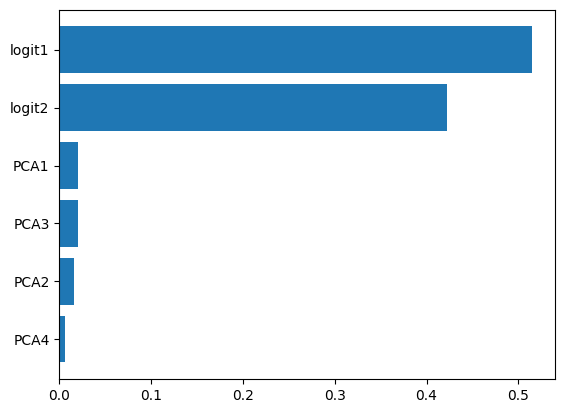

In [62]:
import matplotlib.pyplot as plt
sorted_idx=RF_model.feature_importances_.argsort()
imp=RF_model.feature_importances_
plt.barh(X.columns[sorted_idx],imp[sorted_idx])

In [63]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 KB 258.1 kB/s eta 0:00:00 kB/s eta 0:00:01:01


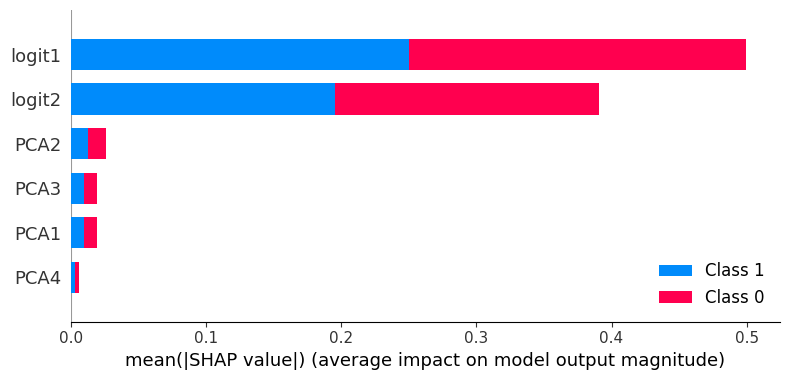

In [66]:
import shap
explainer=shap.TreeExplainer(RF_model)
shap_val=explainer.shap_values(X_test)

shap.summary_plot(shap_val, X_test, plot_type="bar")

### DECISION TREES:

In [20]:
DF_model=DecisionTreeClassifier(max_depth=7,random_state=42,class_weight='balanced')

In [21]:
DF_model.fit(X,y)

DecisionTreeClassifier(class_weight='balanced', max_depth=7, random_state=42)

In [22]:
Y_predict_DF=DF_model.predict(X_test)

In [23]:
print("The DF_model accuracy is given as : ",metrics.accuracy_score(y_test,Y_predict_DF))

The DF_model accuracy is given as :  0.7678571428571429


In [24]:
print(classification_report(y_test,Y_predict_DF))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85        39
           1       0.70      0.41      0.52        17

    accuracy                           0.77        56
   macro avg       0.74      0.67      0.68        56
weighted avg       0.76      0.77      0.75        56



### SUPPORT VECTOR MACHINE:

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid= {'C':[0.1,1,10,100],
             'gamma':[1,0.1,0.01,0.001],
             'kernel':['rbf']
            }

grid= GridSearchCV(SVC(),param_grid=param_grid,refit=True,verbose=3)

#grid.fit(Xp,Y)
grid.fit(X,y)

#finding the best parameters:
print(grid.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.529 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.920 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.940 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.860 total time=   0.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.961 total time=   0.1s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.1s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=1.000 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.1s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.980 total time=   0.1s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.980 total time=   0.1s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

In [26]:
SVM_model = SVC(kernel='rbf',C=10, gamma=0.01, class_weight='balanced',random_state=5,probability=True)

In [27]:
SVM_model.fit(X,y)

SVC(C=10, class_weight='balanced', gamma=0.01, probability=True, random_state=5)

In [28]:
Y_predict_SVM=SVM_model.predict(X_test)

In [29]:
Y_predict_SVM

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [30]:
prob=SVM_model.predict_proba(X_test)
prob

array([[9.67486714e-01, 3.25132863e-02],
       [9.89272440e-01, 1.07275597e-02],
       [9.13198502e-01, 8.68014976e-02],
       [9.75971045e-01, 2.40289552e-02],
       [9.86638901e-01, 1.33610989e-02],
       [8.29746669e-01, 1.70253331e-01],
       [9.96083000e-01, 3.91699978e-03],
       [9.96577563e-01, 3.42243740e-03],
       [8.74845832e-01, 1.25154168e-01],
       [9.83349994e-01, 1.66500056e-02],
       [9.79810228e-01, 2.01897716e-02],
       [9.29528692e-01, 7.04713082e-02],
       [9.91474618e-01, 8.52538177e-03],
       [1.01778271e-05, 9.99989822e-01],
       [9.99119566e-01, 8.80433513e-04],
       [9.73893884e-01, 2.61061160e-02],
       [9.95201153e-01, 4.79884732e-03],
       [7.40209553e-01, 2.59790447e-01],
       [9.97234562e-01, 2.76543827e-03],
       [8.83416806e-01, 1.16583194e-01],
       [9.69119159e-01, 3.08808411e-02],
       [9.86028325e-01, 1.39716749e-02],
       [7.74017500e-02, 9.22598250e-01],
       [9.94261897e-01, 5.73810268e-03],
       [9.826579

In [31]:
print("The SVM_accuracy is given as : ",metrics.accuracy_score(y_test,Y_predict_SVM))

The SVM_accuracy is given as :  0.8035714285714286


In [32]:
print(classification_report(y_test,Y_predict_SVM))

              precision    recall  f1-score   support

           0       0.79      0.97      0.87        39
           1       0.88      0.41      0.56        17

    accuracy                           0.80        56
   macro avg       0.83      0.69      0.72        56
weighted avg       0.82      0.80      0.78        56



### ANALYSING THE MISCLASSIFIED DATA POINTS:

In [33]:
df=pd.DataFrame(data_t['speaker'])
df['true_label']=y_test
df['predicted_label']=Y_predict_RF
df.head()

,speaker,true_label,predicted_label
0,600,0,0
1,602,1,0
2,604,1,0
3,605,0,0
4,606,0,0


In [36]:
misclassified=df[df['true_label']!=df['predicted_label']]
print(len(misclassified))


11


In [37]:
samples=misclassified['speaker']
samples.tolist()

[602, 604, 636, 637, 640, 649, 659, 661, 664, 693, 716]

In [38]:
info=pd.read_csv('/home/vboxuser/Downloads/test_split.csv')
info.head()

,Participant_ID,Gender,PHQ_Binary,PHQ_Score,PCL-C (PTSD),PTSD Severity,predict,percentage,persad,predict_sad,predict_m_45
0,600,female,0,5,0,23.0,0,22.222222,22.222222,0,0
1,602,female,1,13,1,67.0,0,28.571429,17.857143,0,0
2,604,male,1,12,0,30.0,1,40.000000,40.000000,1,0
3,605,male,0,2,0,23.0,0,8.695652,8.695652,0,0
4,606,female,0,5,0,46.0,0,0.000000,0.000000,0,0


In [39]:
mis_info=info[info['Participant_ID'].isin(samples)]
mis_info

,Participant_ID,Gender,PHQ_Binary,PHQ_Score,PCL-C (PTSD),PTSD Severity,predict,percentage,persad,predict_sad,predict_m_45
1,602,female,1,13,1,67.0,0,28.571429,17.857143,0,0
2,604,male,1,12,0,30.0,1,40.000000,40.000000,1,0
20,636,female,1,15,1,62.0,0,22.535211,14.084507,0,0
21,637,female,1,16,0,49.0,1,40.425532,29.787234,0,0
23,640,male,1,17,0,35.0,1,50.000000,26.923077,0,1
24,649,male,1,19,1,68.0,0,26.829268,21.951220,0,0
31,659,male,1,16,1,55.0,0,33.333333,31.666667,0,0
32,661,female,1,19,1,67.0,0,30.909091,14.545455,0,0
34,664,male,0,2,0,23.0,1,42.372881,32.203390,0,0
44,693,male,0,3,0,36.0,0,33.333333,26.666667,0,0


In [40]:
misclassified['phq_score']=mis_info['PHQ_Score']
misclassified

/tmp/ipykernel_5582/453936520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  misclassified['phq_score']=mis_info['PHQ_Score']


,speaker,true_label,predicted_label,phq_score
1,602,1,0,13
2,604,1,0,12
20,636,1,0,15
21,637,1,0,16
23,640,1,0,17
24,649,1,0,19
31,659,1,0,16
32,661,1,0,19
34,664,0,1,2
44,693,0,1,3


In [41]:
sev=pd.DataFrame(mis_info['PHQ_Score'])
sev['true_class']=misclassified['true_label']
sev['pred_class']=misclassified['predicted_label']
sev

,PHQ_Score,true_class,pred_class
1,13,1,0
2,12,1,0
20,15,1,0
21,16,1,0
23,17,1,0
24,19,1,0
31,16,1,0
32,19,1,0
34,2,0,1
44,3,0,1


<AxesSubplot: xlabel='PHQ_Score', ylabel='Count'>

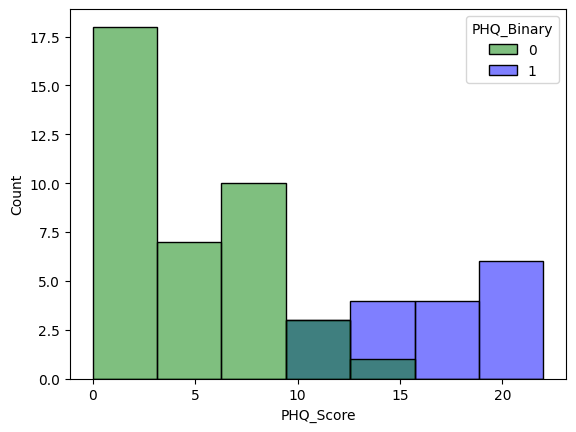

In [44]:
import seaborn as sns
sns.histplot(data=info,x='PHQ_Score',hue='PHQ_Binary',palette=['green','blue'])

In [46]:
data['class'].value_counts()

1    126
0    126
Name: class, dtype: int64

<AxesSubplot: xlabel='logit1', ylabel='logit2'>

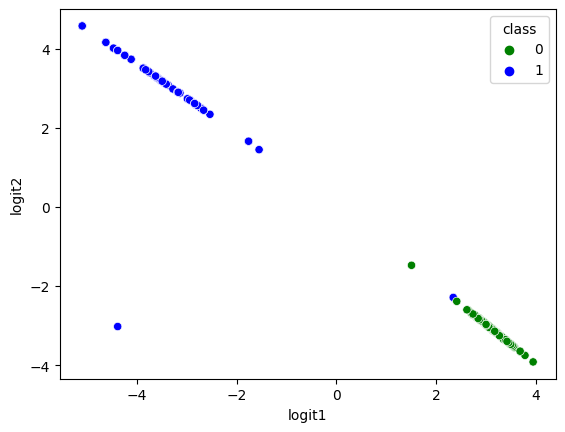

In [48]:
sns.scatterplot(x="logit1",
                    y="logit2",
                    data=data,hue='class',palette=['green','blue'])

In [28]:
data=pd.merge(pca,logits,on='speaker',how='inner')


In [120]:
data.duplicated().sum()

482

In [30]:
data['class_y'].value_counts()

1    530
0    126
Name: class_y, dtype: int64

In [123]:
data=data.drop_duplicates()